In [2]:
#%matplotlib.inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['savefig.dpi'] = 200

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel('./data/HR Data.xlsx')
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [6]:
df.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'emp no', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Over18',
       'Training Times Last Year', 'Age', 'CF_current Employee', 'Daily Rate',
       'Distance From Home', 'Education', 'Employee Count',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [7]:
df.isnull().sum()

Attrition                     0
Business Travel               0
CF_age band                   0
CF_attrition label            0
Department                    0
Education Field               0
emp no                        0
Employee Number               0
Gender                        0
Job Role                      0
Marital Status                0
Over Time                     0
Over18                        0
Training Times Last Year      0
Age                           0
CF_current Employee           0
Daily Rate                    0
Distance From Home            0
Education                     0
Employee Count                0
Environment Satisfaction      0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income                0
Monthly Rate                  0
Num Companies Worked          0
Percent Salary Hike           0
Performance Rating            0
Relationship Satisfaction     0
Standard

In [20]:
# employees less than 21 but greater and equal to 18
len(df[df['Age'] < 21])

28

In [21]:
# employees less than 24 but greater and equal to 18
len(df[df['Age'] < 24])

71

In [22]:
# employees less than 30 but greater and equal to 18
len(df[df['Age'] < 30])

326

In [14]:
df.groupby('Department').sum().drop(['Age', 'Employee Number', 'Stock Option Level', 'Hourly Rate', 'Standard Hours'], axis='columns')

,Training Times Last Year,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Job Involvement,Job Level,Job Satisfaction,Monthly Income,...,Num Companies Worked,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
Department,,,,,,,,,,,,,,,,,,,,,
HR,161,51,47347,548,63,169,173,128,164,419234,...,185,930,198,182,728,184,456,223,112,231
R&D,2684,828,775384,8788,961,2637,2635,1900,2620,6036284,...,2627,14695,3039,2603,10900,2619,6597,3993,2054,3925
Sales,1270,354,356923,4177,446,1195,1205,1006,1227,3103791,...,1147,6733,1399,1202,4953,1256,3249,2001,1050,1905


In [19]:
print(len(df[(df['Age'] > 26) & (df['Age'] < 30)]['Age']))

164


In [17]:
len(df[df['Age'] < 24])

71

In [70]:
df[['emp no','Employee Number', 'Age', 'Employee Count']]

,emp no,Employee Number,Age,Employee Count
0,STAFF-1,1,41,1
1,STAFF-2,2,49,1
2,STAFF-4,4,37,1
3,STAFF-5,5,33,1
4,STAFF-7,7,27,1
...,...,...,...,...
1465,STAFF-1905,1905,34,1
1466,STAFF-1868,1868,29,1
1467,STAFF-1667,1667,35,1
1468,STAFF-1878,1878,22,1


In [68]:
min(df['Age'])

18

(array([ 28.,  29.,  40.,  65.,  96., 128., 130., 135., 147., 108., 139.,
         78.,  74.,  57.,  43.,  49.,  37.,  40.,  18.,  29.]),
 array([18. , 20.1, 22.2, 24.3, 26.4, 28.5, 30.6, 32.7, 34.8, 36.9, 39. ,
        41.1, 43.2, 45.3, 47.4, 49.5, 51.6, 53.7, 55.8, 57.9, 60. ]),
 <BarContainer object of 20 artists>)

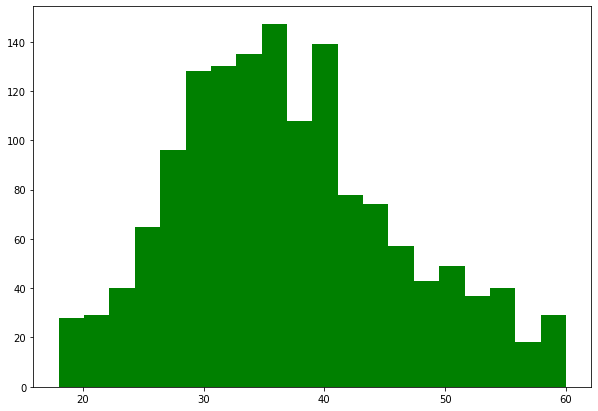

In [53]:
plt.figure(figsize=[10, 7])
#plt.hlines(df['Age'], [18, 60], [18, 60], colors='y')
plt.hist(df['Age'], bins=20, color='g')


In [62]:
#dir(plt)

In [54]:
plt.bar?

In [92]:
df.loc[:,['Job Role', 'Job Satisfaction', 'Job Involvement', 'Job Level']]

,Job Role,Job Satisfaction,Job Involvement,Job Level
0,Sales Executive,4,3,2
1,Research Scientist,2,2,2
2,Laboratory Technician,3,2,1
3,Research Scientist,3,3,1
4,Laboratory Technician,2,3,1
...,...,...,...,...
1465,Research Scientist,1,1,1
1466,Research Scientist,4,2,1
1467,Sales Executive,4,3,2
1468,Research Scientist,2,3,1
